In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'CustomerID': range(1, 11),
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 30],
    'Annual Income (k$)': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
})
##print(df.info)

ModuleNotFoundError: No module named 'seaborn'

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,10.00000,10.000000,10.00000,10.000000
mean,5.50000,28.800000,19.50000,49.400000
std,3.02765,13.464356,3.02765,35.094159
min,1.00000,19.000000,15.00000,3.000000
25%,3.25000,21.250000,17.25000,14.250000
50%,5.50000,23.000000,19.50000,56.000000
75%,7.75000,30.750000,21.75000,76.750000
max,10.00000,64.000000,24.00000,94.000000


In [5]:
 df.shape

(10, 5)

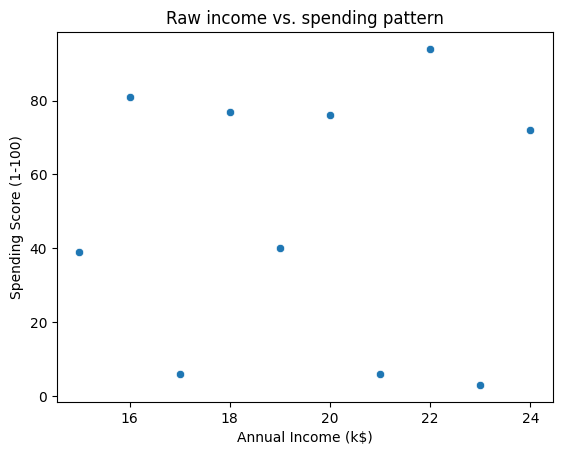

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# 1C – visual check of obvious driver variables
sns.scatterplot(data=df,
                x='Annual Income (k$)',
                y='Spending Score (1-100)')
plt.title("Raw income vs. spending pattern")
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
print(df.head(5))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2  Female   21                  16                      81
2           3  Female   20                  17                       6
3           4    Male   23                  18                      77
4           5  Female   31                  19                      40


In [13]:
df['GenderEncoder'] = LabelEncoder().fit_transform(df['Gender'])

In [22]:
##Derived feature

df['income_per_age'] =  df['Annual Income (k$)']/(df['Age'] + 1e-5)

In [23]:
print(df.head(5))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2  Female   21                  16                      81   
2           3  Female   20                  17                       6   
3           4    Male   23                  18                      77   
4           5  Female   31                  19                      40   

   GenderEncoder  income_per_age  
0              1        0.789473  
1              0        0.761904  
2              0        0.850000  
3              1        0.782608  
4              0        0.612903  


In [32]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'GenderEncoder', 'income_per_age'],
      dtype='object')

In [38]:
features = df[['Annual Income (k$)','Spending Score (1-100)','GenderEncoder','income_per_age']]

In [41]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(features)

In [45]:
# print(x_scaled)

from sklearn.cluster import KMeans
k0 = 3                          # first guess
kmeans = KMeans(n_clusters=k0, random_state=42)
labels = kmeans.fit_predict(x_scaled)


In [48]:
##Hypertunning
from sklearn.metrics import silhouette_score
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    lbl = km.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, lbl)
    print(f"k={k}  silhouette={score:0.3f}")


k=2  silhouette=0.320
k=3  silhouette=0.292
k=4  silhouette=0.267
k=5  silhouette=0.194
k=6  silhouette=0.081
k=7  silhouette=0.108
k=8  silhouette=0.097
k=9  silhouette=0.041


ValueError: Number of labels is 10. Valid values are 2 to n_samples - 1 (inclusive)